# Data Analysis Of Uber Data Set | Analysis / Visualization 

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
%matplotlib inline
sns.set_style('whitegrid')

## Importing dataset

In [2]:
df = pd.read_csv('data/Uber Dataset/My Uber Drives - 2016.csv')

### Printing top 10 data of the dataset

In [3]:
df.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


### Printing last 10 data of the dataset

In [4]:
df.tail(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1146,12/30/2016 11:31,12/30/2016 11:56,Business,Kar?chi,Kar?chi,2.9,Errand/Supplies
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Kar?chi,Kar?chi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


#### From above data, we clearly see that the last row is not useful in our dataset that's why we dropped this.

In [5]:
df.drop([1155], inplace=True)

In [6]:
df.shape

(1155, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [8]:
df.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

### Printing the unique values of START* point

In [9]:
df['START*'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Whitebridge',
       'Lake Wellingborough', 'Fayetteville Street', 'Raleigh',
       'Hazelwood', 'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill',
       'Northwoods', 'Edgehill Farms', 'Tanglewood', 'Preston',
       'Eastgate', 'East Elmhurst', 'Jackson Heights', 'Long Island City',
       'Katunayaka', 'Unknown Location', 'Colombo', 'Nugegoda',
       'Islamabad', 'R?walpindi', 'Noorpur Shahan', 'Heritage Pines',
       'Westpark Place', 'Waverly Place', 'Wayne Ridge', 'Weston',
       'East Austin', 'West University', 'South Congress', 'The Drag',
       'Congress Ave District', 'Red River District', 'Georgian Acres',
       'North Austin', 'Coxville', 'Conven

In [10]:
len(df['START*'].unique())

177

### Printing the unique values of STOP* point

In [11]:
df['STOP*'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Palm Beach', 'Cary',
       'Morrisville', 'New York', 'Queens', 'East Harlem', 'NoMad',
       'Midtown', 'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Queens County', 'Gulfton', 'Downtown',
       'Houston', 'Jamestown Court', 'Durham', 'Whitebridge',
       'Lake Wellingborough', 'Raleigh', 'Umstead', 'Hazelwood',
       'Westpark Place', 'Meredith Townes', 'Leesville Hollow', 'Apex',
       'Chapel Hill', 'Williamsburg Manor', 'Macgregor Downs',
       'Edgehill Farms', 'Northwoods', 'Tanglewood', 'Preston',
       'Walnut Terrace', 'Jackson Heights', 'East Elmhurst',
       'Midtown West', 'Long Island City', 'Jamaica', 'Unknown Location',
       'Colombo', 'Nugegoda', 'Katunayaka', 'Islamabad', 'R?walpindi',
       'Noorpur Shahan', 'Heritage Pines', 'Waverly Place', 'Wayne Ridge',
       'Depot Historic District', 'Weston', 'West University',
       'South Congress', 'Arts District', 'Congress Ave District

In [12]:
len(df['STOP*'].unique())

188

### Printing the data whose START* point is San Francisco

In [13]:
df[df['START*'] == 'San Francisco']

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
362,5/9/2016 14:39,5/9/2016 15:06,Business,San Francisco,Palo Alto,20.5,Between Offices
440,6/14/2016 16:09,6/14/2016 16:39,Business,San Francisco,Emeryville,11.6,Meeting
836,10/19/2016 14:02,10/19/2016 14:31,Business,San Francisco,Berkeley,10.8,NaN
917,11/7/2016 19:17,11/7/2016 19:57,Business,San Francisco,Berkeley,13.2,Between Offices
919,11/8/2016 12:16,11/8/2016 12:49,Business,San Francisco,Berkeley,11.3,Meeting
927,11/9/2016 18:40,11/9/2016 19:17,Business,San Francisco,Oakland,12.7,Customer Visit
933,11/10/2016 15:17,11/10/2016 15:22,Business,San Francisco,Oakland,9.9,Temporary Site
966,11/15/2016 20:44,11/15/2016 21:00,Business,San Francisco,Berkeley,11.8,Temporary Site


### Printing the most frequent START* point

In [14]:
df['START*'].value_counts()

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START*, Length: 177, dtype: int64

In [15]:
# df['START*'].value_counts().head(1)
starting_point = df['START*'].dropna()
most_stp  = pd.DataFrame(starting_point.value_counts())
most_stp.sort_values(['START*'], ascending=False)
most_stp = most_stp.reset_index()
most_stp = most_stp.rename(columns= {'index': 'starting_destination', 'START*': 'Count'})
most_stp.loc[most_stp['Count'] == max(most_stp['Count'])]

,starting_destination,Count
0,Cary,201


### Printing the most frequent STOP* point

In [16]:
df['STOP*'].value_counts()

Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: STOP*, Length: 188, dtype: int64

In [17]:
# df['START*'].value_counts().head(1)
stopping_point = df['STOP*'].dropna()
most_stop  = pd.DataFrame(stopping_point.value_counts())
most_stop.sort_values(['STOP*'], ascending=False)
most_stop = most_stop.reset_index()
most_stop = most_stop.rename(columns= {'index': 'stopping_destination', 'STOP*': 'Count'})
most_stop.loc[most_stop['Count'] == max(most_stop['Count'])]

,stopping_destination,Count
0,Cary,203


### Printing the most frequent route

In [18]:
most_freq = df.dropna()
most_freq = pd.DataFrame(most_freq.groupby(['START*', 'STOP*']).size())
most_freq = most_freq.reset_index()
most_freq = most_freq.rename(columns = {0: 'Count'})
most_freq  = most_freq.sort_values(['Count'], ascending=False)
most_freq.loc[most_freq['Count'] == max(most_freq['Count'])]

,START*,STOP*,Count
26,Cary,Morrisville,52


### Printing the unique PURPOSE*

In [19]:
print(np.array(df['PURPOSE*'].dropna().unique()))

['Meal/Entertain' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


<AxesSubplot:>

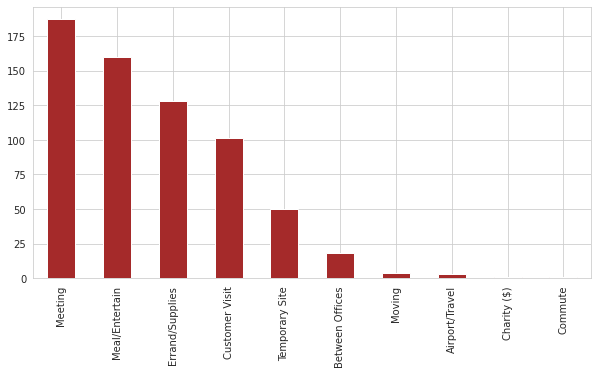

In [20]:
purposes = df['PURPOSE*'].value_counts()
purposes.plot(kind='bar', figsize=(10, 5), color='brown')

### How long do people travel with Uber?

In [21]:
df['MILES*'].sum()

12204.7

<AxesSubplot:ylabel='Frequency'>

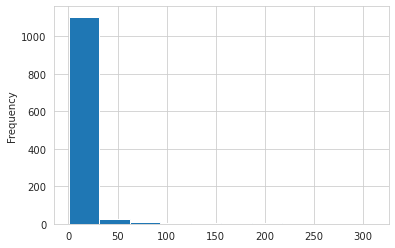

In [22]:
df['MILES*'].plot.hist()

### Printing the distance travelled for different purposes

In [23]:
df['MILES*'].groupby(df['PURPOSE*']).sum()

PURPOSE*
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES*, dtype: float64

### How much distances does people travel for different purposes??

In [24]:
pur_dist = pd.DataFrame(df['MILES*'].groupby(df['PURPOSE*']).sum())
pur_dist = pur_dist.sort_values(['MILES*'], ascending=False)
pur_dist

,MILES*
PURPOSE*,
Meeting,2851.3
Customer Visit,2089.5
Meal/Entertain,911.7
Temporary Site,523.7
Errand/Supplies,508.0
Between Offices,197.0
Commute,180.2
Moving,18.2
Airport/Travel,16.5


##### Using matplotlib

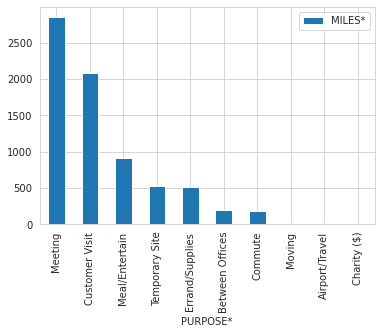

In [25]:
pur_dist.plot(kind = 'bar')
plt.show()

##### Using seaborn

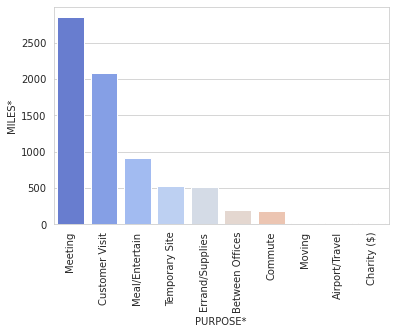

In [26]:
pur_dist = pur_dist.reset_index()
plt.xticks(rotation=90)
sns.barplot(x = 'PURPOSE*', y = 'MILES*', data = pur_dist, palette='coolwarm')
plt.show()

### Plot number of trips vs Category of trips

In [27]:
df['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

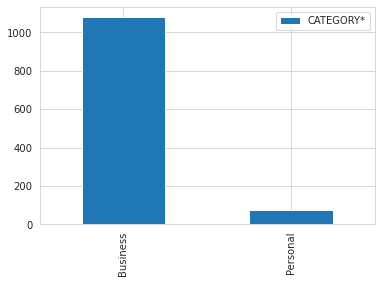

In [28]:
trips = pd.DataFrame(df['CATEGORY*'].value_counts())
trips.reset_index()

trips.plot(kind='bar')
plt.show()

##### Data visualization of CATEGORY* feature using seaborn

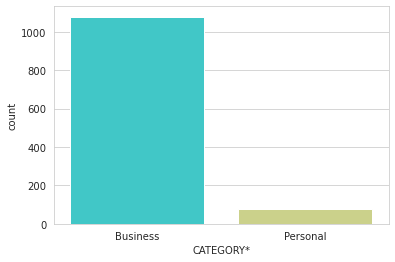

In [29]:
sns.countplot(x = 'CATEGORY*', data = df, palette='rainbow')
plt.show()

In [30]:
miles = df.groupby(['CATEGORY*']).sum()
business = miles.iloc[0, 0]/(miles.iloc[0, 0] + miles.iloc[1, 0])
personal = miles.iloc[1, 0]/(miles.iloc[0, 0] + miles.iloc[1, 0])

print('Business', business)
print('Personal', personal)

Business 0.9411947856153776
Personal 0.058805214384622315


### Now dealing with START_DATE* and END_DATE*

In [31]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format = '%m/%d/%Y %H:%M')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format = '%m/%d/%Y %H:%M')

In [32]:
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [33]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]

for x in df['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
    
df['HOUR'] = hour
df['DAY'] = day
df['DAY OF WEEK'] = dayofweek
df['MONTH'] = month
df['WEEKDAY'] = weekday

In [34]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,2,5,1,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     653 non-null    object        
 7   HOUR         1155 non-null   int64         
 8   DAY          1155 non-null   int64         
 9   DAY OF WEEK  1155 non-null   int64         
 10  MONTH        1155 non-null   int64         
 11  WEEKDAY      1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 149.6+ KB


 ### What hour do most people take Uber to their Destination??

In [36]:
hours = df['START_DATE*'].dt.hour.value_counts()
# hours = df['HOUR'].value_counts()
hours

15    98
17    95
13    94
18    94
14    89
16    88
12    77
11    72
20    71
19    68
10    65
9     51
21    51
8     35
22    31
23    26
0     19
7     13
1      5
5      4
6      4
3      3
2      2
Name: START_DATE*, dtype: int64

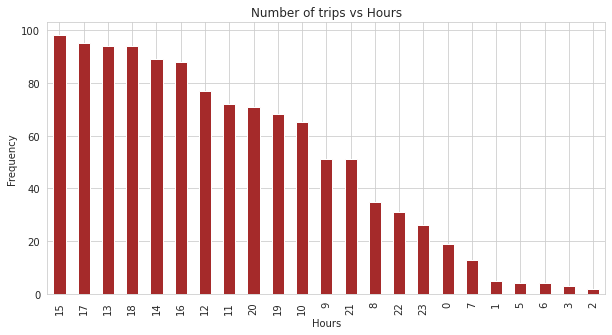

In [37]:
hours.plot(kind='bar', color='brown', figsize=(10, 5))

plt.title('Number of trips vs Hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

### Which day has the highest number of trips??

In [38]:
df['WEEKDAY'].value_counts()

Friday       206
Tuesday      176
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: WEEKDAY, dtype: int64

<AxesSubplot:>

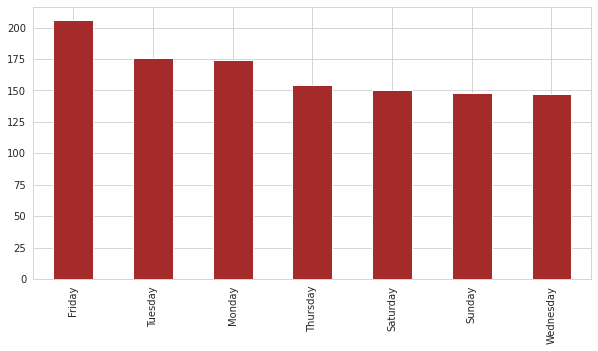

In [39]:
df['WEEKDAY'].value_counts().plot(kind='bar', figsize=(10, 5), color='brown')

### What are the number of trips per each day??

In [40]:
df['DAY'].value_counts()

19    67
29    51
27    51
26    45
22    45
21    45
12    44
1     43
16    42
18    38
20    38
13    37
11    37
8     37
28    36
10    35
25    35
7     34
23    34
6     33
14    33
4     33
5     33
3     33
17    33
30    32
2     30
24    29
9     29
15    28
31    15
Name: DAY, dtype: int64

<AxesSubplot:>

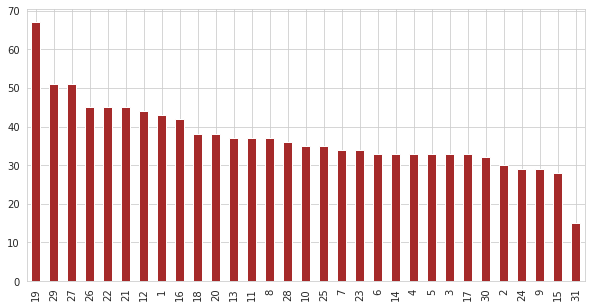

In [41]:
df['DAY'].value_counts().plot(kind='bar', figsize=(10, 5), color='brown')

### What are the trips in the months??

In [42]:
df['MONTH'].value_counts()

12    146
8     133
11    122
2     115
3     113
7     112
6     108
10    106
1      61
4      54
5      49
9      36
Name: MONTH, dtype: int64

<AxesSubplot:>

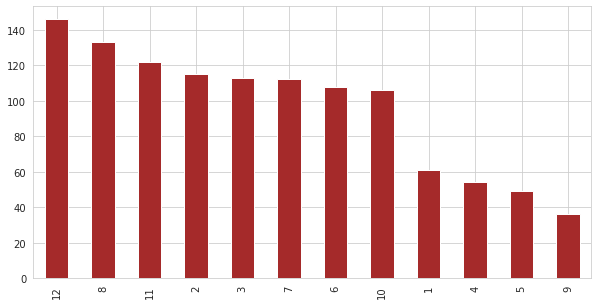

In [43]:
df['MONTH'].value_counts().plot(kind='bar', figsize=(10, 5), color='brown')